#**💻 LAPTOP PRICE PREDICTION FOR SMARTTECH CO** *Using ML*

* This project presents a Laptop Price Prediction System utilizing supervised
machine learning techniques. Specifically, we employ the Random Forest algorithm, which has demonstrated an prediction accuracy of **81.24%**.

* In this analysis, multiple independent variables are considered, while the dependent variable, laptop price is the focus of our predictions. The model's performance is evaluated by comparing the actual and predicted values of the price, allowing us to assess the precision of the results.

* The proposed system predicts the price based on various influential factors, including the laptop's model, RAM, storage type (HDD/SSD), GPU, CPU, IPS display, and touch screen features. By leveraging these attributes, we aim to provide a reliable estimation of laptop prices in the market.

* **Key Feature Influencing Price** : *RAM is a critical factor affecting laptop performance and price, 8 GB RAM highest sales.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop.csv')
df.shape

(1303, 13)

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Checking Duplicates
df.duplicated().sum()

0

In [6]:
# Checking NULL Values before Droping
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [7]:
# Dropping NULL Values
df.dropna(inplace=True)

In [8]:
# Checking NULL Values
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [9]:
# Rechecking Shape after Dropping NULL
df.shape

(1273, 13)

In [10]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace=True)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
# Removing GB
df['Ram'] = df['Ram'].str.replace('GB', '')

In [13]:
# Removing kg
df['Weight'] = df['Weight'].str.replace('kg', '')

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
# Replacing ? with 1.45 in weight
df['Weight'] = df['Weight'].replace('?', '1.45')

In [16]:
# Type Casting
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [17]:
# Replacing ? with 15.60 in Inches and Converting object to float
df['Inches'] = df['Inches'].replace('?', '15.60')
df['Inches'] = df['Inches'].astype('float32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 104.4+ KB


# EDA

<Axes: xlabel='Price', ylabel='Density'>

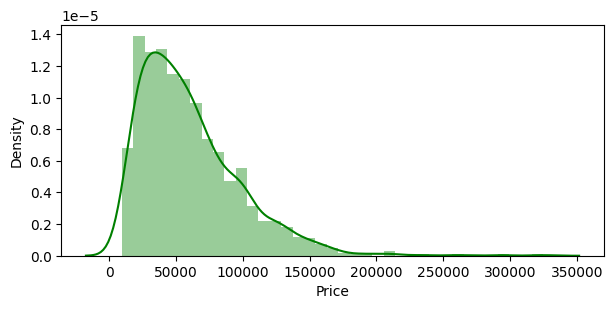

In [136]:
plt.figure(figsize = (7, 3))
sns.distplot(df['Price'], color = 'green')

# Working on **Company**

<Axes: xlabel='Company'>

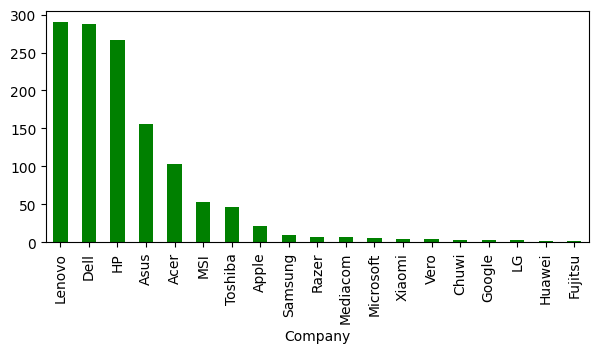

In [20]:
plt.figure(figsize = (7, 3))
df['Company'].value_counts().plot(kind = 'bar', color = 'green')

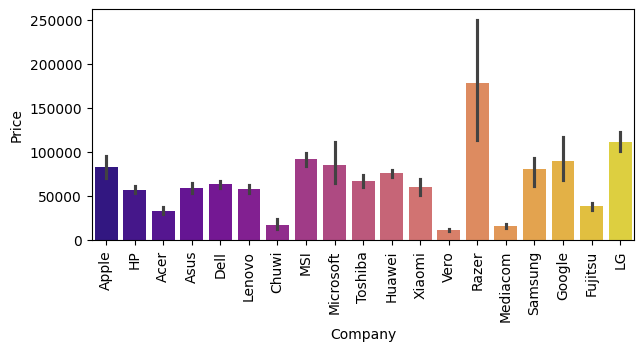

In [135]:
plt.figure(figsize = (7, 3))
sns.barplot(x = df['Company'], y = df['Price'], palette = 'plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# Working on **TypeName**

<Axes: xlabel='TypeName'>

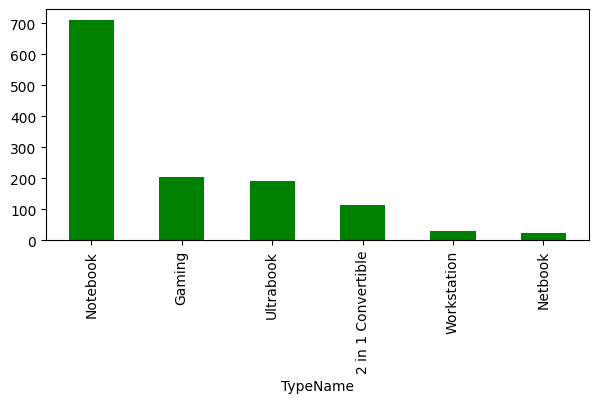

In [134]:
plt.figure(figsize = (7, 3))
df['TypeName'].value_counts().plot(kind = 'bar', color = 'green')

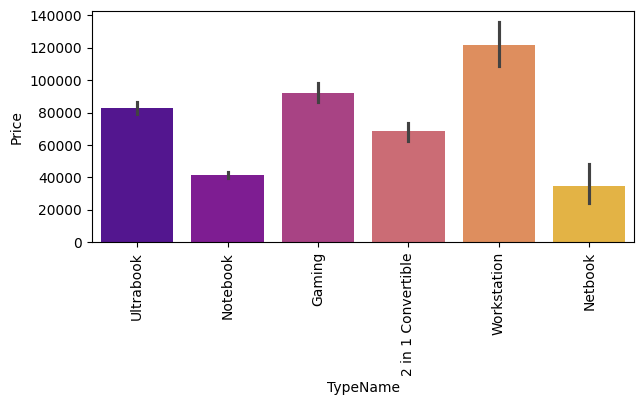

In [133]:
plt.figure(figsize = (7, 3))
sns.barplot(x = df['TypeName'], y = df['Price'], palette = 'plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# Working on **Inches**

<Axes: xlabel='Inches', ylabel='Price'>

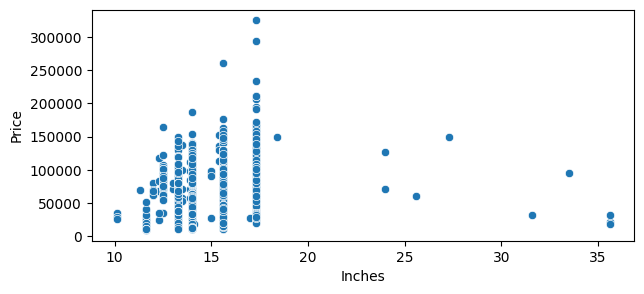

In [24]:
plt.figure(figsize = (7, 3))
sns.scatterplot(x = df['Inches'], y = df['Price'])

# Working on **Screen Resolution**

In [25]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [26]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [27]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1088
1,185


In [28]:
df['Ips'].value_counts()

,count
Ips,
0,914
1,359


<ipython-input-29-d69796af7807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Touchscreen'], y = df['Price'], palette = 'plasma')


<Axes: xlabel='Touchscreen', ylabel='Price'>

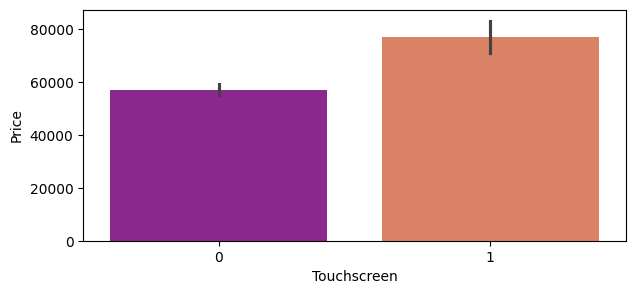

In [29]:
plt.figure(figsize = (7, 3))
sns.barplot(x = df['Touchscreen'], y = df['Price'], palette = 'plasma')

<Axes: xlabel='Ips', ylabel='Price'>

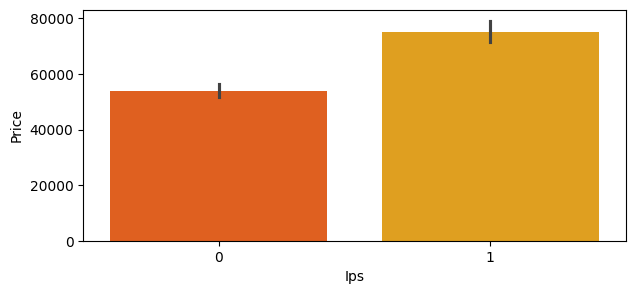

In [132]:
plt.figure(figsize = (7, 3))
sns.barplot(x = df['Ips'], y = df['Price'], palette = 'autumn')

<Axes: xlabel='Ips'>

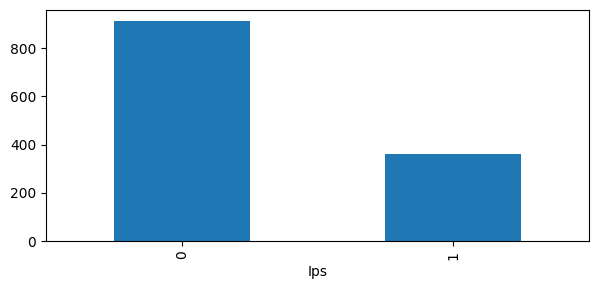

In [31]:
plt.figure(figsize = (7, 3))
df['Ips'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen'>

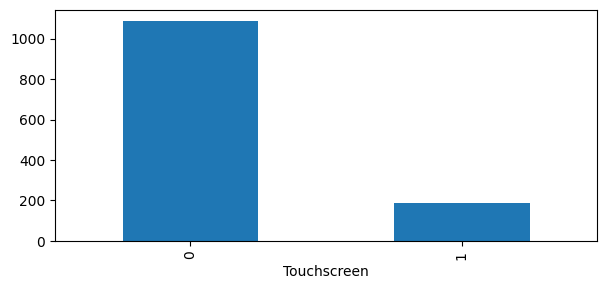

In [32]:
plt.figure(figsize = (7, 3))
df['Touchscreen'].value_counts().plot(kind = 'bar')

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [34]:
df['ScreenResolution'].str.split('x', n = 1, expand = True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
df['X_res'] = df['ScreenResolution'].str.split('x', n = 1, expand = True)[0]
df['Y_res'] = df['ScreenResolution'].str.split('x', n = 1, expand = True)[1]

In [36]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [37]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float32
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float32(2), float64(1), int32(1), int64(4), object(7)
memory usage: 144.2+ KB


In [42]:
df['Company'].astype(str)

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1298,Lenovo
1299,Lenovo
1300,Lenovo
1301,HP


In [43]:
numerical_features = df.select_dtypes(include=np.number).columns
df_corr = df[numerical_features].corr()
df_corr['Price']

,Price
Inches,0.044966
Ram,0.685648
Weight,0.175589
Price,1.000000
Touchscreen,0.188994
Ips,0.254851
X_res,0.557556
Y_res,0.554069


# Adding new column **PPI**

In [44]:
df['PPI'] = ((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

In [45]:
df.drop(columns = ['ScreenResolution'],inplace = True)

In [46]:
df.drop(columns = ['Inches', 'X_res', 'Y_res'], inplace = True)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001


# Analysis on **CPU**

In [48]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [49]:
df.shape

(1273, 12)

In [50]:
df['Cpu Brand'] = df['Cpu'].apply(lambda x:" " .join(x.split()[0:3]))

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


In [52]:
def processor_type(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
      return text
    else:
      if text.split()[0] == 'Intel':
        return 'Other Intel Processor'
      else:
        return 'AMD Processor'

In [53]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand
499,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,48538.080,0,1,141.211995,Intel Core i5
409,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15,16221.096,0,0,135.094207,Intel Celeron Dual
307,Toshiba,Notebook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Nvidia GeForce 930M,Windows 10,2.20,55571.040,0,1,141.211995,Intel Core i7
655,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,56689.920,0,1,141.211995,Intel Core i5
1055,HP,Notebook,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,37570.392,0,0,100.454667,Intel Core i3


In [54]:
df['Cpu brand'] = df['Cpu Brand'].apply(processor_type)

In [55]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Brand,Cpu brand
952,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,77788.800,0,0,165.632116,Intel Core i5,Intel Core i5
909,LG,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,101178.720,1,1,157.350512,Intel Core i7,Intel Core i7
524,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,47365.920,0,1,127.335680,Intel Core i5,Intel Core i5
900,Dell,2 in 1 Convertible,Intel Core i7 7Y75 1.3GHz,8,512GB SSD,Intel HD Graphics 615,Windows 10,1.24,107257.968,1,0,276.053526,Intel Core i7,Intel Core i7
96,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.20,31962.672,0,0,141.211995,Intel Core i7,Intel Core i7


In [56]:
df['Cpu brand'].value_counts()

,count
Cpu brand,
Intel Core i7,515
Intel Core i5,410
Other Intel Processor,151
Intel Core i3,134
AMD Processor,63


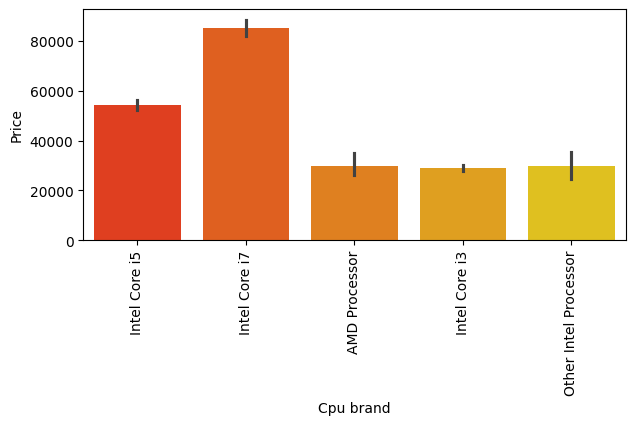

In [131]:
plt.figure(figsize = (7, 3))
sns.barplot(x = df['Cpu brand'], y = df['Price'], palette = 'autumn')
plt.xticks(rotation = 'vertical')
plt.show()

In [58]:
df.drop(columns = ['Cpu', 'Cpu Brand'], inplace = True)

In [59]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand
1061,Asus,Gaming,16,1TB HDD,Nvidia GeForce GTX 965M,No OS,4.00,53173.4400,0,1,127.335680,Intel Core i7
843,Dell,Notebook,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,38041.3872,0,0,100.454667,Intel Core i5
998,Asus,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.7200,0,0,141.211995,Intel Core i7
1063,Dell,Notebook,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0,0,141.211995,Intel Core i7
1160,Lenovo,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.70,79866.7200,0,0,157.350512,Intel Core i7


# Analysis on **RAM**

<Axes: xlabel='Ram'>

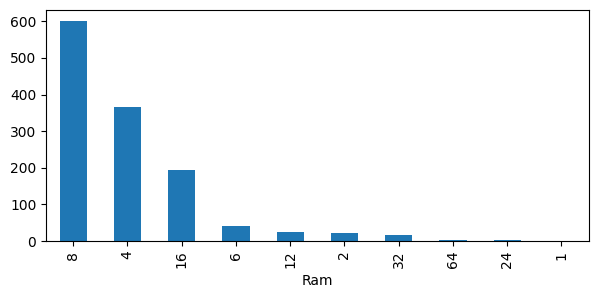

In [60]:
plt.figure(figsize = (7, 3))
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ram', ylabel='Price'>

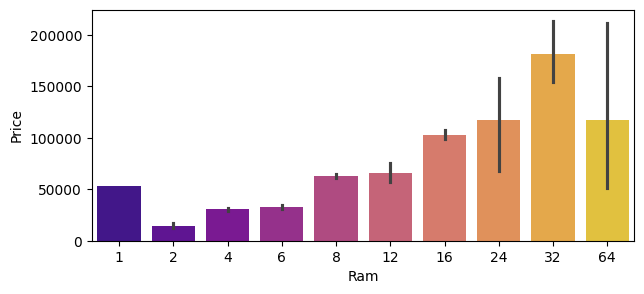

In [130]:
plt.figure(figsize = (7,3))
sns.barplot(x = df['Ram'], y = df['Price'], palette = 'plasma')

# Analysis on **Memory**

In [62]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [63]:
df['Memory'] = df['Memory'].replace('?', '1TB HDD', regex=False)

In [64]:
df['Memory'].iloc[:1][0]

'128GB SSD'

Four most common variants observed: HDD,
SSD, Flash, Hybrid.

We will remove decimal space for example 1.0 TB will become 1TB.

We will replace the word GB with ""

We will replace the word TB with "000"

We will split the word across the "+" character

In [65]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split('+',n=1,expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


* Eliminating White Spaces



In [66]:
df['First'] = newdf[0]
df['First'] = df['First'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,First
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD


* Creating Layer 1 column for each memory type

In [67]:
def applychanges(value):
    df['Layer1'+value] = df['First'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD','SSD','Hybrid','Flash']
for value in listtoapply:
    applychanges(value)


df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0


* Removing all charecters

In [68]:
df['First'] = df['First'].str.replace(r'\D','', regex = True)
df['First'].value_counts()

,count
First,
256,495
1000,244
128,173
512,138
500,130
32,44
64,16
2000,16
16,10


In [69]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256,0,1,0,0,None


* Creating Layer2 column

In [70]:
def applychanges1(value):
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)

listtoapply1 = ['HDD','SSD','Hybrid','Flash']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

* Removing all charecters

In [71]:
df['Second'] = df['Second'].str.replace(r'\D','', regex = True)
df['Second'].value_counts()

,count
Second,
0,1069
1000,183
2000,15
256,3
500,2
512,1


In [72]:
df['First'] = df['First'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


* Multiplying and storing in subsequent

In [73]:
df["HDD"]=(df["First"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["First"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["First"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash Storage"]=(df["First"]*df["Layer1Flash"]+df["Second"]*df["Layer2Flash"])

* Dropping Unnecessary columns

In [74]:
df.drop(columns=['First', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash'],inplace=True)

In [75]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


In [76]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


In [77]:
numerical_features = df.select_dtypes(include=np.number).columns
df_corr = df[numerical_features].corr()
df_corr['Price']

,Price
Ram,0.685648
Weight,0.175589
Price,1.000000
Touchscreen,0.188994
Ips,0.254851
PPI,0.468636
HDD,-0.095248
SSD,0.668416
Hybrid,0.007843
Flash Storage,-0.038332


* **Hybrid** and **Flash** storages are almost negligible, lets drop them.
* **HDD** and **SDD** are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use **SDD** instead of **HDD** and vice versa as well

In [78]:
df.drop(columns = ['Hybrid', 'Flash Storage'],inplace = True)
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256


# Analysis on **GPU**

In [79]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [80]:
z = df['Gpu'].iloc[1]
print(z.split()[0])

Intel


In [81]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

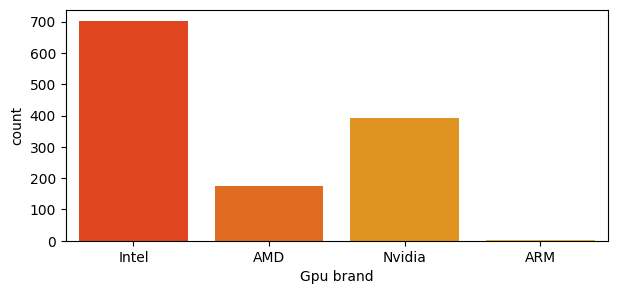

In [82]:
plt.figure(figsize = (7, 3))
sns.countplot(x='Gpu brand', data=df, palette='autumn', hue='Gpu brand')
plt.show()

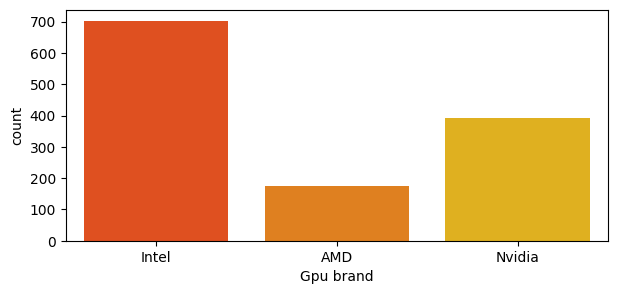

In [83]:
plt.figure(figsize = (7, 3))
df = df[df['Gpu brand'] != 'ARM']
sns.countplot(x='Gpu brand', data=df, palette='autumn', hue='Gpu brand')
plt.show()

In [84]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,703
Nvidia,393
AMD,176


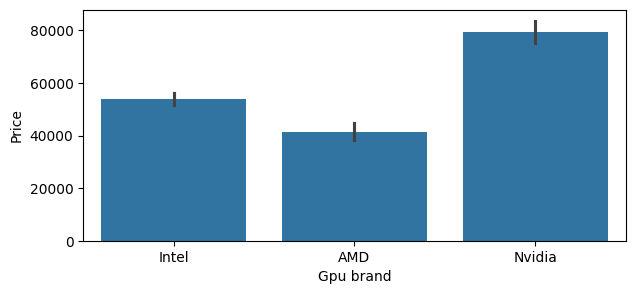

In [85]:
plt.figure(figsize=(7,3))
sns.barplot(x = 'Gpu brand',y = 'Price', data = df)
plt.show()

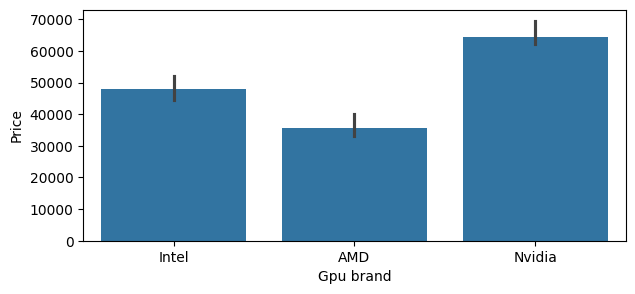

In [86]:
plt.figure(figsize=(7,3))
sns.barplot(x = 'Gpu brand',y = 'Price', data = df, estimator=np.median)
plt.show()

# Analysis on **Operating System (OpSys)**

In [87]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


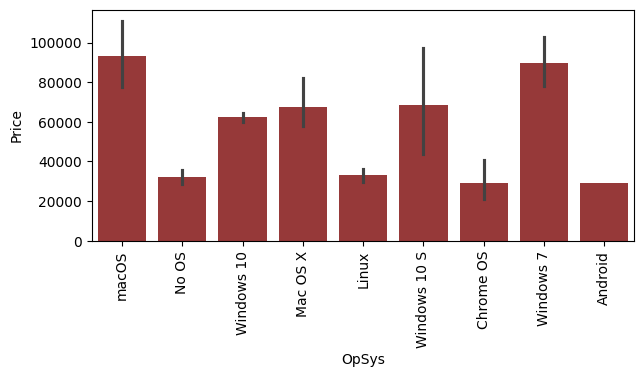

In [88]:
plt.figure(figsize=(7,3))
sns.barplot(x = 'OpSys',y = 'Price', data = df, color = 'brown')
plt.xticks(rotation = 'vertical')
plt.show()

In [89]:
def Categoryset(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    return 'Windows'
  elif text == 'Mac OS X' or text == 'macOS':
    return 'Mac'
  elif text == 'Linux':
    return 'Linux'
  else:
    return 'Other/No Os/Chrome Os'

In [90]:
df['OpSys'] = df['OpSys'].apply(Categoryset)

In [91]:
df['OpSys'].value_counts()

,count
OpSys,
Windows,1100
Other/No Os/Chrome Os,90
Linux,61
Mac,21


In [92]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
1041,Vero,Notebook,2,Intel HD Graphics 400,Windows,1.45,11231.424,0,0,111.935204,Other Intel Processor,0,0,Intel
756,HP,Notebook,8,Nvidia GeForce GTX 1050,Windows,2.20,58554.720,0,1,141.211995,Intel Core i5,1000,128,Nvidia
1031,Acer,Notebook,6,AMD Radeon R5,Windows,2.10,21791.520,0,0,100.454667,AMD Processor,1000,0,AMD
660,Dell,Notebook,8,Intel HD Graphics 520,Windows,1.56,65481.120,0,0,157.350512,Intel Core i5,0,256,Intel
213,Lenovo,Notebook,8,Intel HD Graphics 620,Other/No Os/Chrome Os,2.20,29250.720,0,0,141.211995,Intel Core i5,0,256,Intel


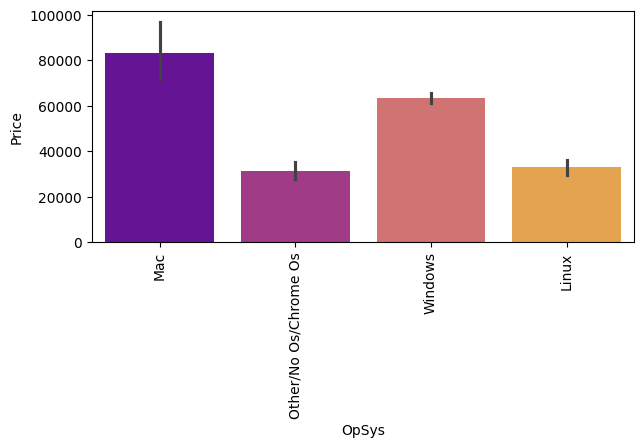

In [129]:
plt.figure(figsize = (7, 3))
sns.barplot(x = 'OpSys', y = 'Price', data = df, palette = 'plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# **Correlation**

In [94]:
numerical_features = df.select_dtypes(include=np.number).columns
df_corr = df[numerical_features].corr()
df_corr['Price']

,Price
Ram,0.685521
Weight,0.175109
Price,1.000000
Touchscreen,0.190738
Ips,0.255987
PPI,0.470554
HDD,-0.095710
SSD,0.668271


# **HeatMap**

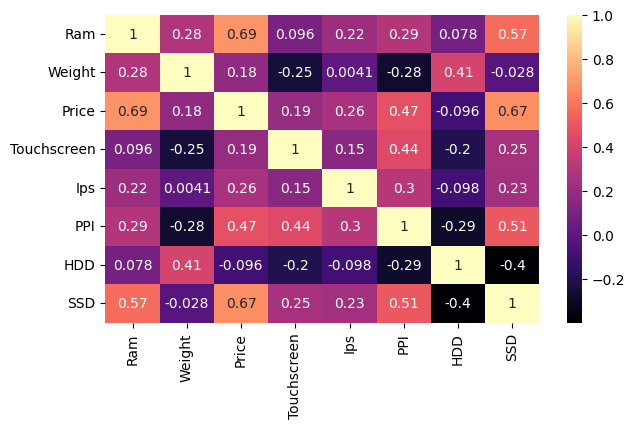

In [95]:
plt.figure(figsize = (7, 4))
sns.heatmap(df_corr, annot = True, cmap = 'magma')
plt.show()

In [96]:
df.drop(columns = ['Gpu'], inplace = True)

* Feature Engineering : PPI, HDD, SSD, Cpu brand, Gpu brand, Touchscreen, Ips, OpSys.


# **Model Building**

<Axes: xlabel='Price', ylabel='Density'>

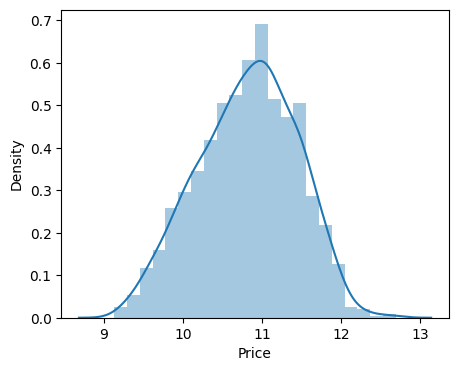

In [128]:
plt.figure(figsize = (5, 4))
sns.distplot(np.log(df['Price']), kde = True)

In [98]:
transformlist = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'OpSys']

In [99]:
x = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [100]:
x


,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other/No Os/Chrome Os,1.86,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983001,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053526,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454667,Intel Core i7,1000,0,AMD


In [101]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [127]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
x = pd.get_dummies(x, columns = transformlist, drop_first=True)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 2)

In [105]:
x_train.shape, x_test.shape

((1081, 39), (191, 39))

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  **Linear Regression**

In [107]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results: ")
print(f"MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R2 Score: {r2_linear}")

Linear Regression Results: 
MAE: 0.2334523847776554, MSE: 0.10297107384152836, RMSE: 0.3208910622649505, R2 Score: 0.6910527957054142


# **Random Forest**

In [108]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=2)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results: ")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R2 Score: {r2_rf}")


Random Forest Results: 
MAE: 0.18181999530018636, MSE: 0.06197135052009977, RMSE: 0.24894045577225846, R2 Score: 0.8140654965004056


# **Gradient Boosting**

In [109]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=2)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Results: ")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, R2 Score: {r2_gb}")



Gradient Boosting Results: 
MAE: 0.1988052023213244, MSE: 0.06406021360011639, RMSE: 0.25310119241148665, R2 Score: 0.8077982178885645


In [110]:
# Comparision

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_linear, mae_rf, mae_gb],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'RMSE': [rmse_linear, rmse_rf, rmse_gb],
    'R2 Score': [r2_linear, r2_rf, r2_gb]})

print("\nComparison of Models: ")
print(results)


Comparison of Models: 
               Model       MAE       MSE      RMSE  R2 Score
0  Linear Regression  0.233452  0.102971  0.320891  0.691053
1      Random Forest  0.181820  0.061971  0.248940  0.814065
2  Gradient Boosting  0.198805  0.064060  0.253101  0.807798


# **HyperParameter Tuning**

In [111]:
# RandomForest Tuning
from sklearn.model_selection import GridSearchCV

param_grid_rf = {'n_estimators': [100,150],'max_depth': [None, 5,10,15]}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=2), param_grid_rf, cv=5)
grid_search_rf.fit(x_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f'Best Random Forest Parameters: {grid_search_rf.best_params_}')

y_pred_best_rf = best_rf_model.predict(x_test)

# Calculate evaluation metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print evaluation metrics
print("Random Forest Evaluation Metrics:")
print(f'MAE: {mae_best_rf}')
print(f'MSE: {mse_best_rf}')
print(f'R²: {r2_best_rf}')

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 150}
Random Forest Evaluation Metrics:
MAE: 0.18270675219851723
MSE: 0.0624981376756108
R²: 0.8124849611822647


# **Feature Importance**

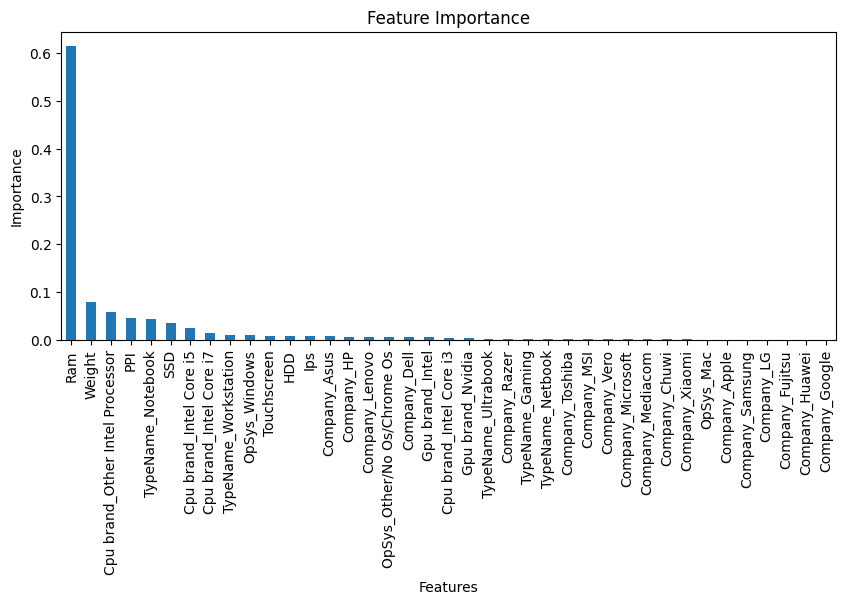

In [112]:
importances = best_rf_model.feature_importances_

feature_importance = pd.Series(importances, index = x.columns).sort_values(ascending = False)

plt.figure(figsize = (10, 4))
feature_importance.plot(kind = 'bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

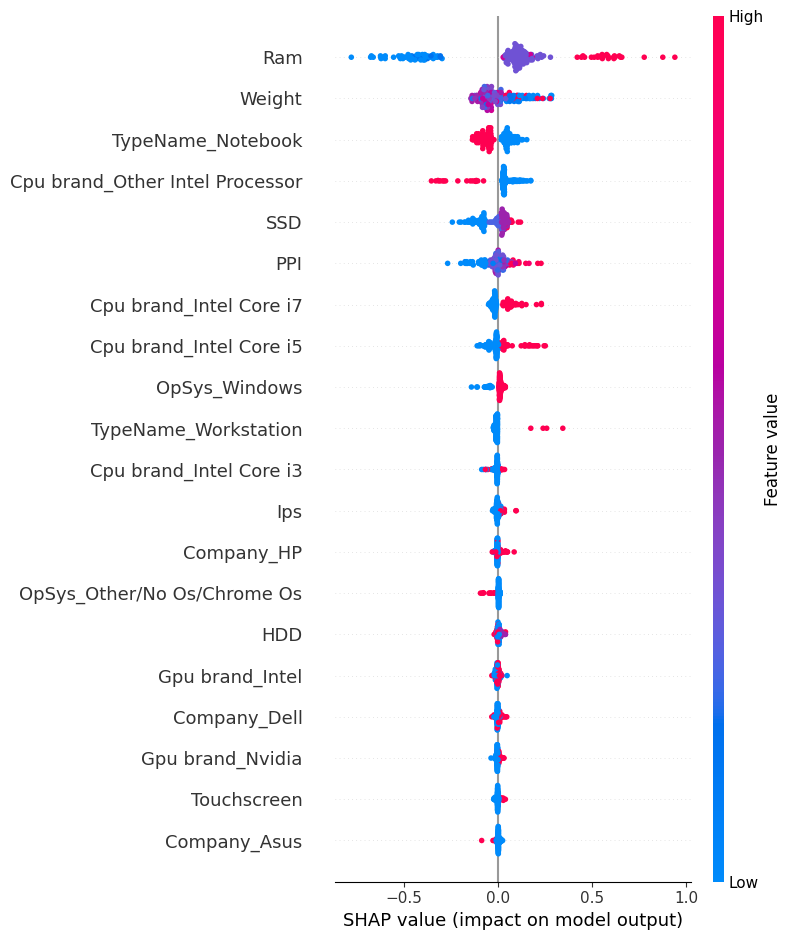

In [113]:
import shap

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

# **Performing Cross Validations for each model**

In [114]:
 # Cross-Validation before tuning for Random Forest
from sklearn.model_selection import cross_val_score
cv_scores_mae_rf = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_absolute_error')

cv_scores_mae_rf = -cv_scores_mae_rf

print("Cross-Validated MAE Scores for Random Forest:", cv_scores_mae_rf)
print("Mean Cross-Validated MAE for Random Forest:", cv_scores_mae_rf.mean())

Cross-Validated MAE Scores for Random Forest: [0.18796299 0.1653013  0.17052919 0.18244085 0.19179401]
Mean Cross-Validated MAE for Random Forest: 0.17960566945883533


In [115]:
# Cross-Validation after tuning for Random Forest
from sklearn.model_selection import cross_val_score

cv_scores_mae = cross_val_score(best_rf_model, x, y, cv=5, scoring='neg_mean_absolute_error')

cv_scores_mae = -cv_scores_mae

print(f'Cross-Validated MAE Scores for Random Forest: {-cv_scores_mae}')
print(f'Mean Cross-Validated MAE for Random Forest: {cv_scores_mae.mean()}')

Cross-Validated MAE Scores for Random Forest: [-0.18694544 -0.16351819 -0.17110674 -0.18433223 -0.19192616]
Mean Cross-Validated MAE for Random Forest: 0.17956575336908803


In [116]:
# Cross-Validation for Linear Regression
cv_scores_mae = cross_val_score(linear_model, x, y, cv=5, scoring='neg_mean_absolute_error')

cv_scores_mae = -cv_scores_mae

print("Cross-Validated MAE Scores for Linear Regression:", cv_scores_mae)
print("Mean Cross-Validated MAE for Linear Regression:", cv_scores_mae.mean())

Cross-Validated MAE Scores for Linear Regression: [0.23703587 0.21177158 0.21312657 0.24401185 0.22722223]
Mean Cross-Validated MAE for Linear Regression: 0.22663362092808598


In [117]:
# Cross-Validation for Gradient Boosting
cv_scores_mae_gb = cross_val_score(gb_model, x, y, cv=5, scoring='neg_mean_absolute_error')

cv_scores_mae_gb = -cv_scores_mae_gb

print("Cross-Validated MAE Scores for Gradient Boosting:", cv_scores_mae_gb)
print("Mean Cross-Validated MAE for Gradient Boosting:", cv_scores_mae_gb.mean())

Cross-Validated MAE Scores for Gradient Boosting: [0.20777972 0.1627351  0.19652359 0.20622656 0.19882689]
Mean Cross-Validated MAE for Gradient Boosting: 0.1944183714464725


In [118]:
final_model = best_rf_model

final_model.fit(x, y)

RandomForestRegressor(n_estimators=150, random_state=2)

In [119]:
y_pred = final_model.predict(x_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Set Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Test Set Performance:
MAE: 0.07
MSE: 0.01
RMSE: 0.09
R-squared: 0.98


# **Actual Price vs Predicted Price**

In [120]:
df['Predicted Price'] = np.exp(final_model.predict(x))
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,70838.910554
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,54787.498910
2,HP,Notebook,8,Other/No Os/Chrome Os,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,35261.998326
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD,140212.574735
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel,83753.638927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,34718.308967
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053526,Intel Core i7,0,512,Intel,80351.437153
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,12274.233982
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454667,Intel Core i7,1000,0,AMD,40776.550086


# **Comparison Plot**

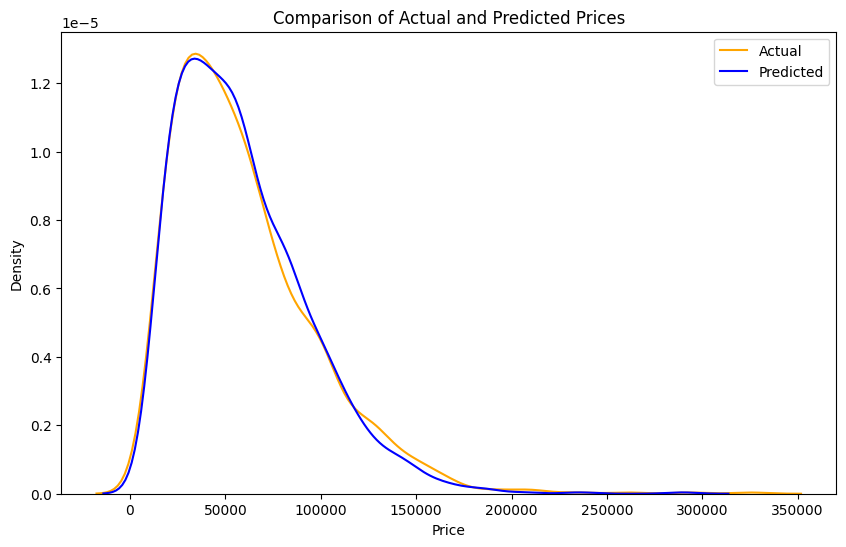

In [121]:
comparison_df = df[['Price', 'Predicted Price']]
comparison_df.rename(columns={'Price': 'Actual Price'}, inplace = True)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=comparison_df, x='Actual Price', fill=False, color='orange', label='Actual')
sns.kdeplot(data=comparison_df, x='Predicted Price', fill=False, color='blue', label='Predicted')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()


In [122]:
#y_pred_exp = np.exp(y_pred_rf) # for random forest
#y_test_exp = np.exp(y_test) # For actal price

In [123]:
from google.colab import files

df.to_pickle('trained_dataset.pkl')
files.download('trained_dataset.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
df.sample(10)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,Predicted Price
476,Dell,Workstation,8,Windows,1.78,128298.2400,0,0,141.211995,Intel Core i7,0,256,Nvidia,116813.990096
109,Lenovo,Notebook,8,Windows,1.58,78854.4000,0,1,157.350512,Intel Core i7,0,256,Intel,68475.143697
806,Toshiba,Notebook,4,Windows,2.10,41558.4000,0,0,100.454667,Intel Core i5,500,0,Intel,35665.295077
913,HP,Notebook,8,Windows,2.04,54291.7872,0,0,141.211995,Intel Core i7,0,256,Nvidia,54856.540592
435,Asus,Gaming,8,Windows,3.20,90309.6000,0,0,127.335680,AMD Processor,1000,256,AMD,76232.860487
1126,Lenovo,2 in 1 Convertible,4,Windows,0.69,25521.1200,1,1,224.173801,Other Intel Processor,0,0,Intel,28517.201846
205,Lenovo,Gaming,16,Other/No Os/Chrome Os,2.40,74485.4400,0,0,141.211995,Intel Core i7,0,512,Nvidia,71932.482229
344,Dell,Ultrabook,8,Windows,1.20,84129.1200,0,0,165.632116,Intel Core i7,0,256,Intel,81076.837268
446,Acer,Notebook,4,Linux,2.40,23539.1040,0,0,100.454667,Intel Core i5,500,0,Intel,25875.645155
95,Acer,2 in 1 Convertible,8,Windows,1.50,45128.1600,1,1,165.632116,Intel Core i5,0,256,Intel,55387.878926


# **Real World Prediction**

In [125]:
new_laptop_data = pd.DataFrame({
    'Company': ['MSI'],
    'TypeName': ['Gaming'],
    'Ram': [16],
    'OpSys': ['Windows'],
    'Weight': [1.86],
    'Touchscreen': [0],
    'Ips': [1],
    'PPI': [1800.5],
    'Cpu brand': ['Intel Core i7'],
    'HDD': [0],
    'SSD': [1000],
    'Hybrid': [0],
    'Flash Storage': [0],
    'Gpu brand': ['Nvidia']
})

# Apply the same preprocessing
new_laptop_data = pd.get_dummies(new_laptop_data, columns=transformlist, drop_first=True)
new_laptop_data = new_laptop_data.reindex(columns=x.columns, fill_value=0)
# Predictions
new_predictions = final_model.predict(new_laptop_data)
print(f'Predicted Price: {np.exp(new_predictions)}')


Predicted Price: [135971.82163075]
